In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/titanic.csv')

#PREPROCESSING

# Fill missing 'Age'
data['Age'].fillna(data['Age'].median(), inplace=True)

# Encoding Gender for Logistic Regression
data['Gender'] = data['Gender'].map({'male': 0, 'female': 1})

# Select features for scaling
features_to_scale = ['Age', 'Fare']

# Scale the features
scaler = StandardScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

#Dropping unnecessary features
data = data.drop(columns=['Embarked'])
data = data.drop(columns=['Cabin'])
data = data.drop(columns=['Ticket'])

# Summary statistics
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Gender,Age,Fare
count,891.000000,891.000000,891.000000,891,891.000000,8.910000e+02,8.910000e+02
unique,NaN,NaN,NaN,891,NaN,NaN,NaN
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",NaN,NaN,NaN
freq,NaN,NaN,NaN,1,NaN,NaN,NaN
mean,446.000000,0.383838,2.308642,NaN,0.352413,2.272780e-16,3.987333e-18
std,257.353842,0.486592,0.836071,NaN,0.477990,1.000562e+00,1.000562e+00
min,1.000000,0.000000,1.000000,NaN,0.000000,-2.224156e+00,-6.484217e-01
25%,223.500000,0.000000,2.000000,NaN,0.000000,-5.657365e-01,-4.891482e-01
50%,446.000000,0.000000,3.000000,NaN,0.000000,-1.046374e-01,-3.573909e-01
75%,668.500000,1.000000,3.000000,NaN,1.000000,4.333115e-01,-2.424635e-02


In [77]:
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,Fare
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.565736,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.663861,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.258337,-0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.433312,0.420730
4,5,0,3,"Allen, Mr. William Henry",0,0.433312,-0.486337


In [78]:
# Select features and target
features = ['Pclass', 'Gender', 'Age', 'Fare']
target = 'Survived'

X = data[features]
y = data[target]

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# matplotlib figure
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

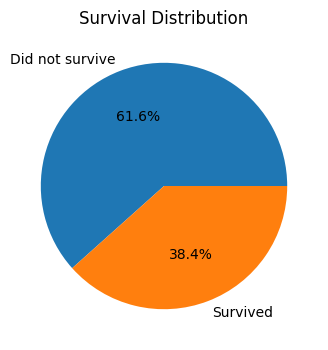

In [80]:
# Pie chart of survival distribution
survival_counts = data['Survived'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(survival_counts, labels=['Did not survive', 'Survived'], autopct='%1.1f%%')
plt.title('Survival Distribution')
plt.show()

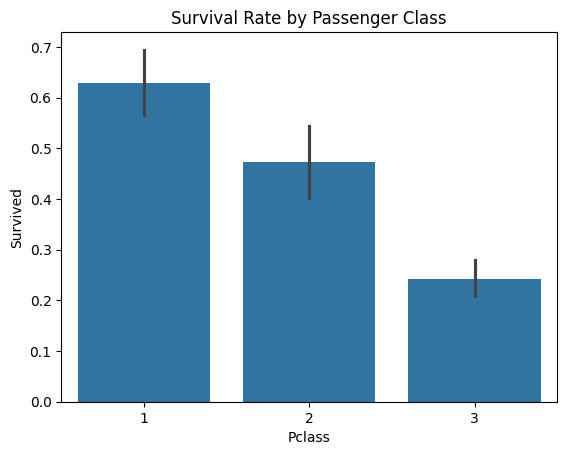

In [81]:
# Bar plot of survival by class
sns.barplot(data=data, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.show()

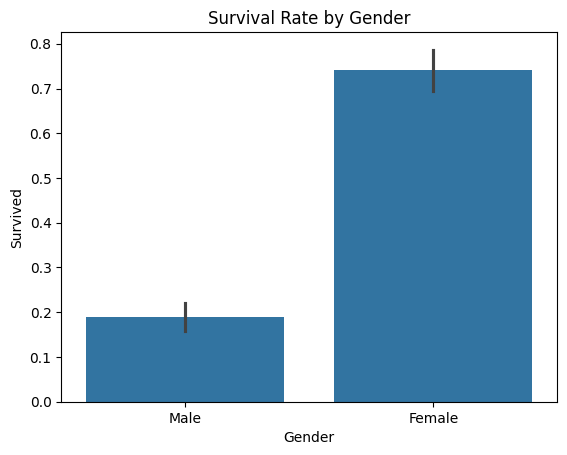

In [82]:
# Bar plot of survival by gender
sns.barplot(data=data, x='Gender', y='Survived')
plt.title('Survival Rate by Gender')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

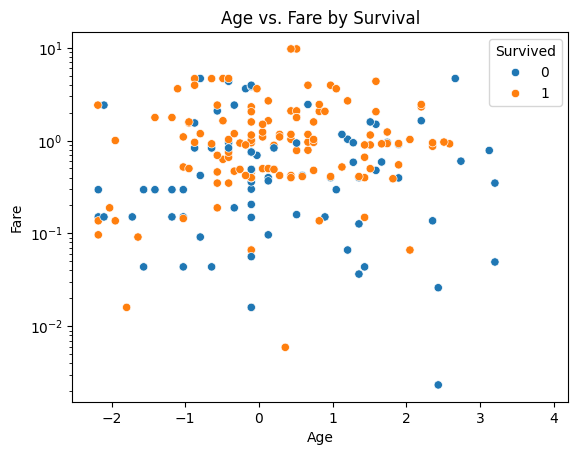

In [83]:
# Age vs. Fare
sns.scatterplot(data=data, x='Age', y='Fare', hue='Survived')
plt.yscale('log')
plt.title('Age vs. Fare by Survival')
plt.legend(title='Survived' )
plt.show()

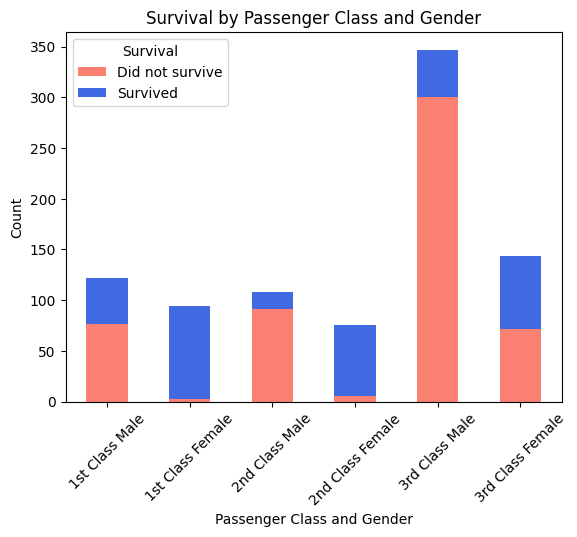

In [84]:
# Grouping and reshaping data
survival_by_class_gender = data.groupby(['Pclass', 'Gender', 'Survived']).size().unstack(fill_value=0)
survival_by_class_gender.columns = ['Did not survive', 'Survived']
# Plotting stacked bar chart
survival_by_class_gender.plot(kind='bar', stacked=True, color=['salmon', 'royalblue'])
plt.title('Survival by Passenger Class and Gender')
plt.xlabel('Passenger Class and Gender')
plt.ylabel('Count')
plt.legend(title='Survival')

# Correcting x-axis ticks and labels
plt.xticks(ticks=range(6), labels=['1st Class Male', '1st Class Female', '2nd Class Male', '2nd Class Female', '3rd Class Male', '3rd Class Female'], rotation=45)

plt.show()

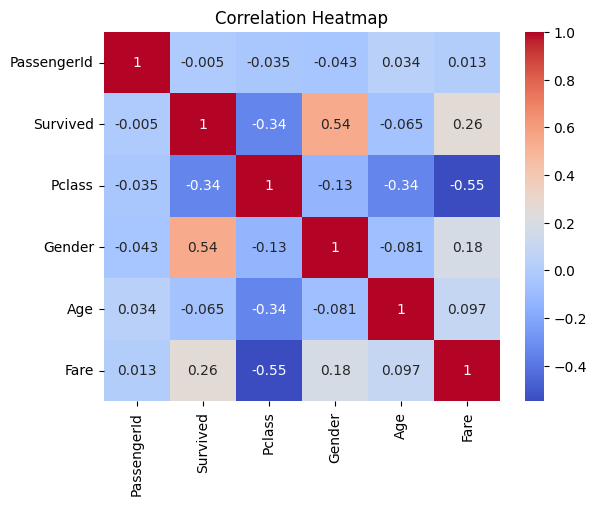

In [85]:
# Correlation heatmap
# Dropping non-numerical columns before calculating correlation
numerical_data = data.select_dtypes(include=['number'])
correlation = numerical_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [86]:
# Model Selection and Training

In [87]:
# Feature scaling
scaler = StandardScaler()
X.loc[:, features] = scaler.fit_transform(X[features])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)

In [89]:
# Model Evaluation
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Performance:
Accuracy: 0.7932960893854749
[[89 16]
 [21 53]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



------------------------------------------------------------------------------
**Interpretation of visualizations, highlighting important trends, correlations, and patterns:**

- The distribution of survival shows that there were more non-survivors than survivors.
- Survival rate by passenger class indicates that passengers in higher classes had a higher chance of survival.
- Survival rate by gender suggests that females had a significantly higher survival rate than males.
- The correlation heatmap indicates some correlations between features, with the strongest correlation being between Age and Fare.


------------------------------------------------------------------------------
 **Documentation summarizing the visualization process, insights gained, and future directions for analysis**

 **Visualization Process:**
- Utilized seaborn and matplotlib for visualizations.
- Plotted Stacked bar chart, bar plots, pie chart, and a correlation heatmap to explore various aspects of the dataset.

**Insights Gained:**
- Survival rate varied significantly based on passenger class and gender.
- There was a moderate correlation between passenger class and fare.

**Future Directions for Analysis:**
- Further exploration of other features' impact on survival, such as family size or cabin location.
